In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel               
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestRegressor
from category_encoders import HashingEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [49]:
data=pd.read_csv('abalone_train.csv')

In [50]:
data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [51]:
data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [53]:
data.isnull().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [54]:
data.duplicated().sum()

0

In [55]:
data.columns

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

C:\Users\7560\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\7560\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\7560\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:ylabel='Density'>

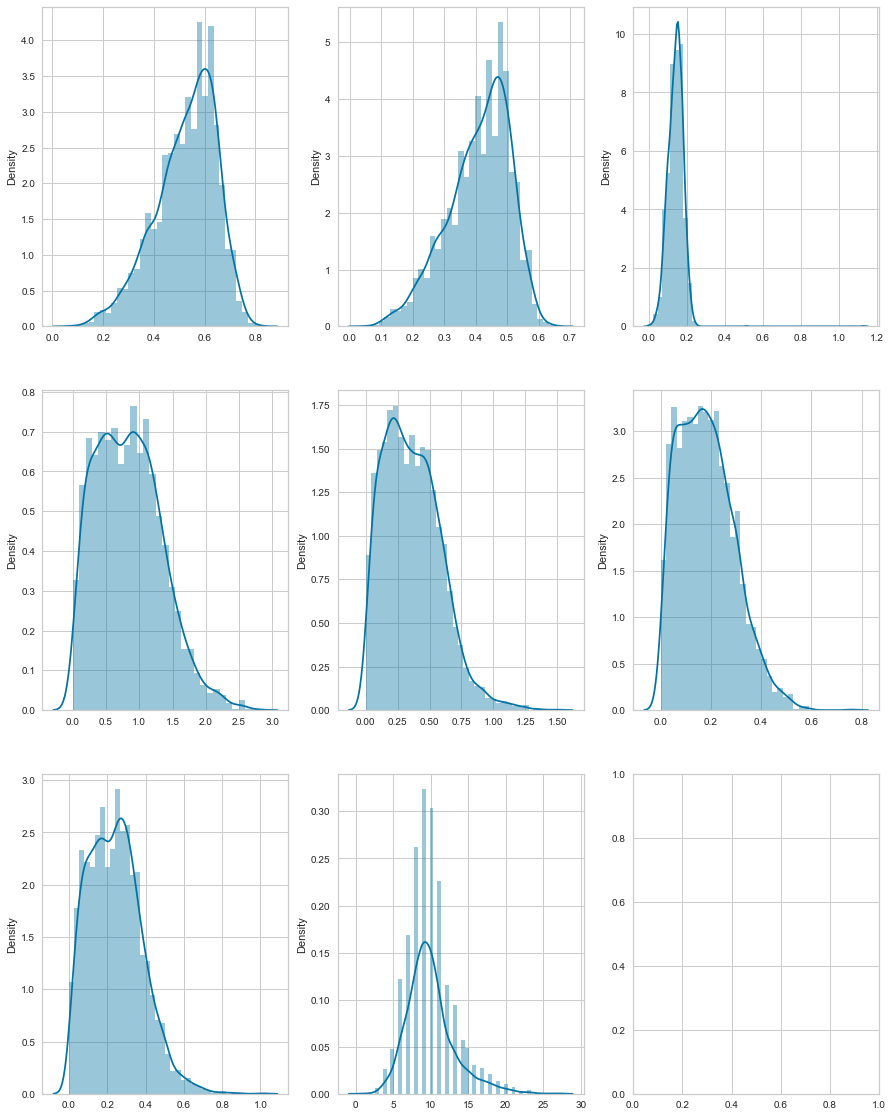

In [36]:
fig, axes=plt.subplots(3,3,figsize=(15,20))
sns.distplot(data,x=data['Length'],ax=axes[0,0])
sns.distplot(data,x=data['Diameter'],ax=axes[0,1])
sns.distplot(data,x=data['Height'],ax=axes[0,2])
sns.distplot(data,x=data['Whole_weight'],ax=axes[1,0])
sns.distplot(data,x=data['Shucked_weight'],ax=axes[1,1])
sns.distplot(data,x=data['Viscera_weight'],ax=axes[1,2])
sns.distplot(data,x=data['Shell_weight'],ax=axes[2,0])
sns.distplot(data,x=data['Rings'],ax=axes[2,1])


<AxesSubplot:xlabel='Sex', ylabel='Count'>

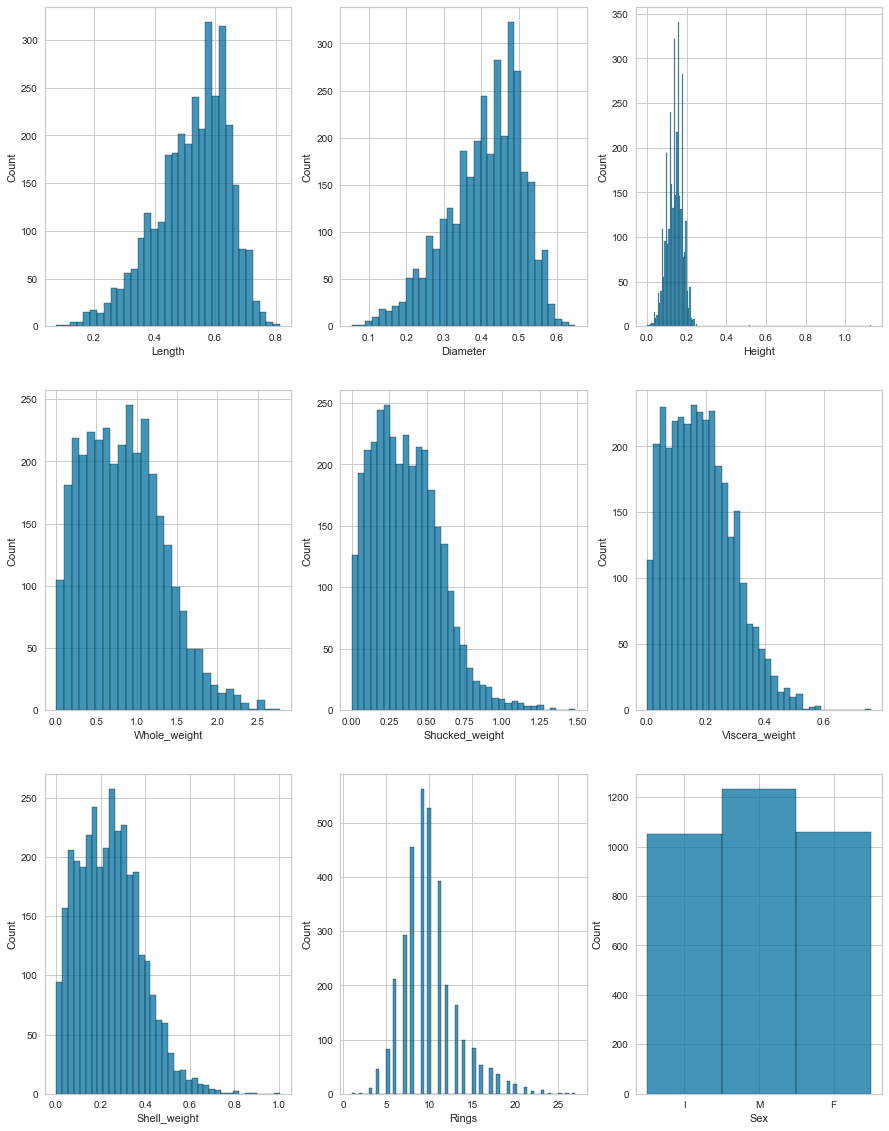

In [42]:
fig, axes=plt.subplots(3,3,figsize=(15,20))
sns.histplot(data,x=data['Length'],ax=axes[0,0])
sns.histplot(data,x=data['Diameter'],ax=axes[0,1])
sns.histplot(data,x=data['Height'],ax=axes[0,2])
sns.histplot(data,x=data['Whole_weight'],ax=axes[1,0])
sns.histplot(data,x=data['Shucked_weight'],ax=axes[1,1])
sns.histplot(data,x=data['Viscera_weight'],ax=axes[1,2])
sns.histplot(data,x=data['Shell_weight'],ax=axes[2,0])
sns.histplot(data,x=data['Rings'],ax=axes[2,1])
sns.histplot(data,x=data['Sex'],ax=axes[2,2])

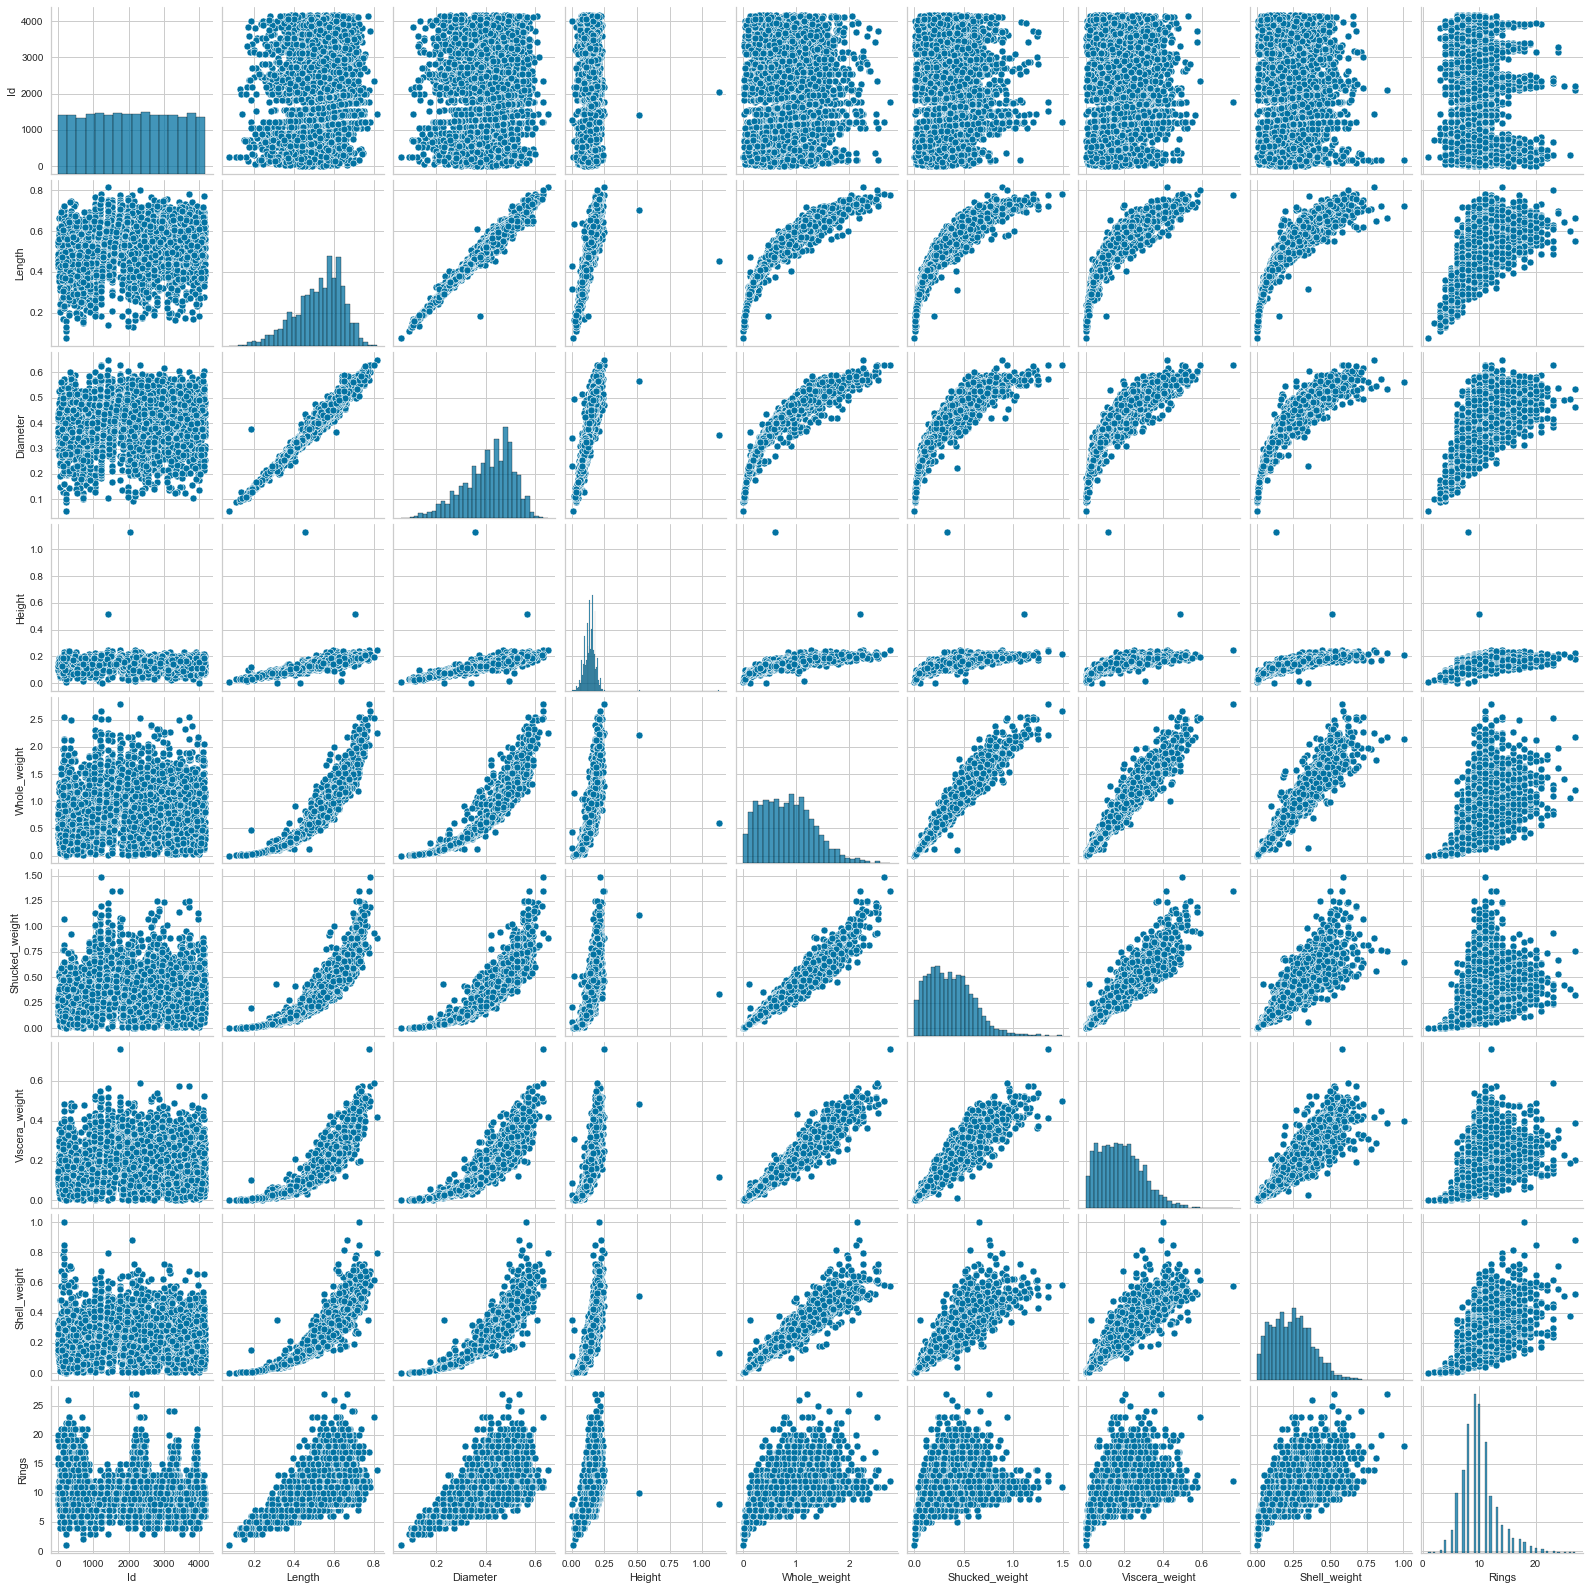

In [38]:
sns.pairplot(data)

<AxesSubplot:>

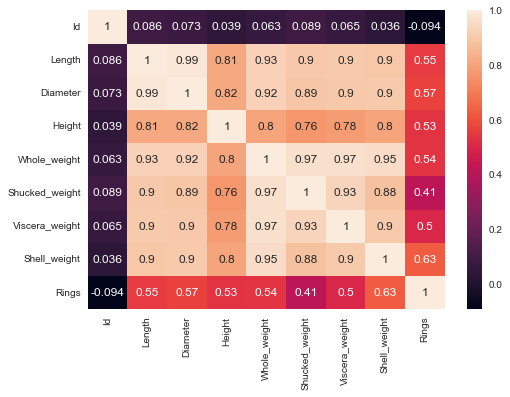

In [40]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Rings'>

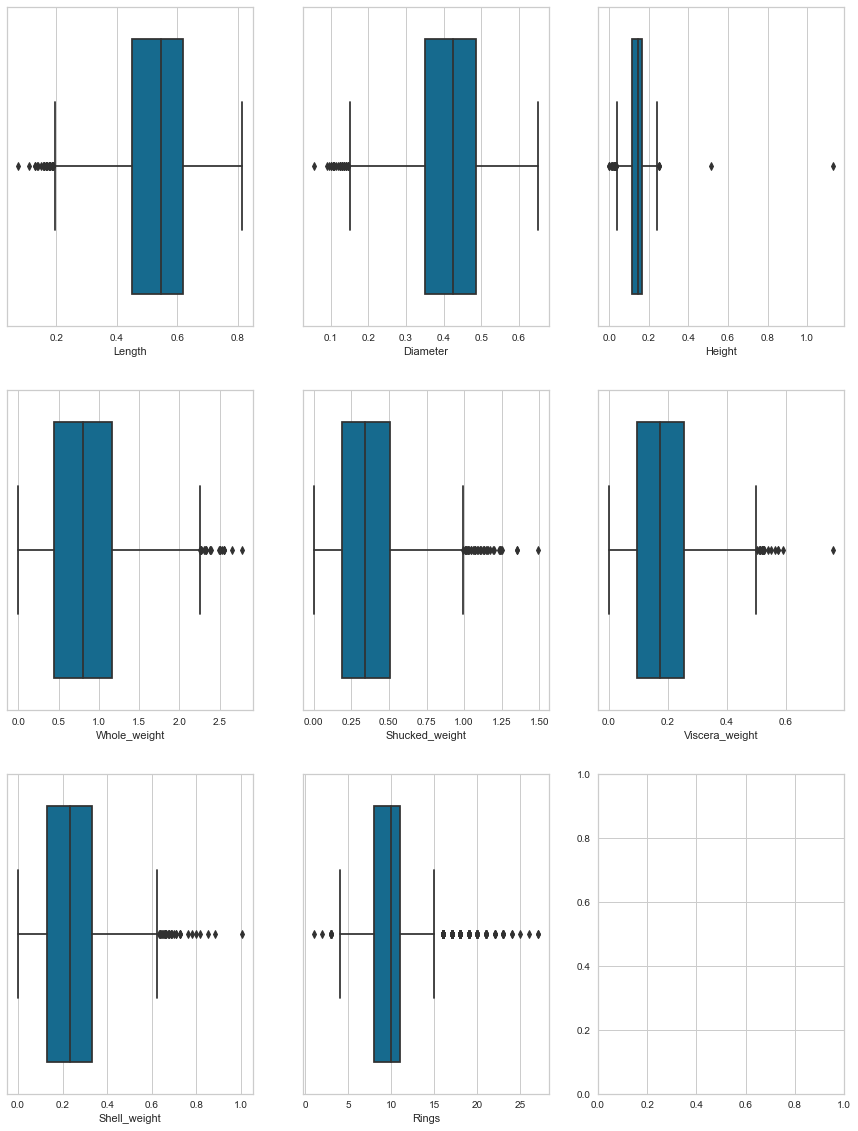

In [44]:
fig, axes=plt.subplots(3,3,figsize=(15,20))
sns.boxplot(data=data,x=data['Length'],ax=axes[0,0])
sns.boxplot(data=data,x=data['Diameter'],ax=axes[0,1])
sns.boxplot(data=data,x=data['Height'],ax=axes[0,2])
sns.boxplot(data=data,x=data['Whole_weight'],ax=axes[1,0])
sns.boxplot(data=data,x=data['Shucked_weight'],ax=axes[1,1])
sns.boxplot(data=data,x=data['Viscera_weight'],ax=axes[1,2])
sns.boxplot(data=data,x=data['Shell_weight'],ax=axes[2,0])
sns.boxplot(data=data,x=data['Rings'],ax=axes[2,1])

In [57]:
data.columns

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [63]:
data1=data.copy()

In [64]:
outlier=['Length', 'Diameter', 'Height', 'Whole_weight','Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

In [65]:
for col in outlier:
    data1[col]=sorted(data1[col])
    q1=np.percentile(data1[col],25)
    q3=np.percentile(data1[col],75)
    iqr=q3-q1
    lwr=q1-(1.5*iqr)
    upr=q3+(1.5*iqr)
    tenth=np.percentile(data1[col],10)
    ninty=np.percentile(data1[col],90)
    print('Column name: ',col)
    print('q1 and q3 :',q1 , q3)
    print('inter quartile range :',iqr)
    print('lower and upper boundary : ',lwr , upr)
    print('tenth percentile : ',tenth)
    print('nintieth percentile : ',ninty)
    print('Max value :',data1[col].max())
    print('Min value :',data1[col].min())
    data1[col]=np.where(data1[col]<lwr,tenth,data1[col])
    data1[col]=np.where(data1[col]>upr,ninty,data1[col])
    print('Imputed successfully')
    print('Max value :',data1[col].max())
    print('Min value :',data1[col].min())
    print('\n')

Column name:  Length
q1 and q3 : 0.45 0.62
inter quartile range : 0.16999999999999998
lower and upper boundary :  0.195 0.875
tenth percentile :  0.36
nintieth percentile :  0.66
Max value : 0.815
Min value : 0.075
Imputed successfully
Max value : 0.815
Min value : 0.195


Column name:  Diameter
q1 and q3 : 0.35 0.485
inter quartile range : 0.135
lower and upper boundary :  0.14749999999999996 0.6875
tenth percentile :  0.27
nintieth percentile :  0.525
Max value : 0.65
Min value : 0.055
Imputed successfully
Max value : 0.65
Min value : 0.15


Column name:  Height
q1 and q3 : 0.115 0.165
inter quartile range : 0.05
lower and upper boundary :  0.039999999999999994 0.24000000000000002
tenth percentile :  0.09
nintieth percentile :  0.185
Max value : 1.13
Min value : 0.0
Imputed successfully
Max value : 0.24
Min value : 0.04


Column name:  Whole_weight
q1 and q3 : 0.4445 1.1685
inter quartile range : 0.7240000000000001
lower and upper boundary :  -0.6415000000000001 2.2545
tenth percenti

<AxesSubplot:xlabel='Rings'>

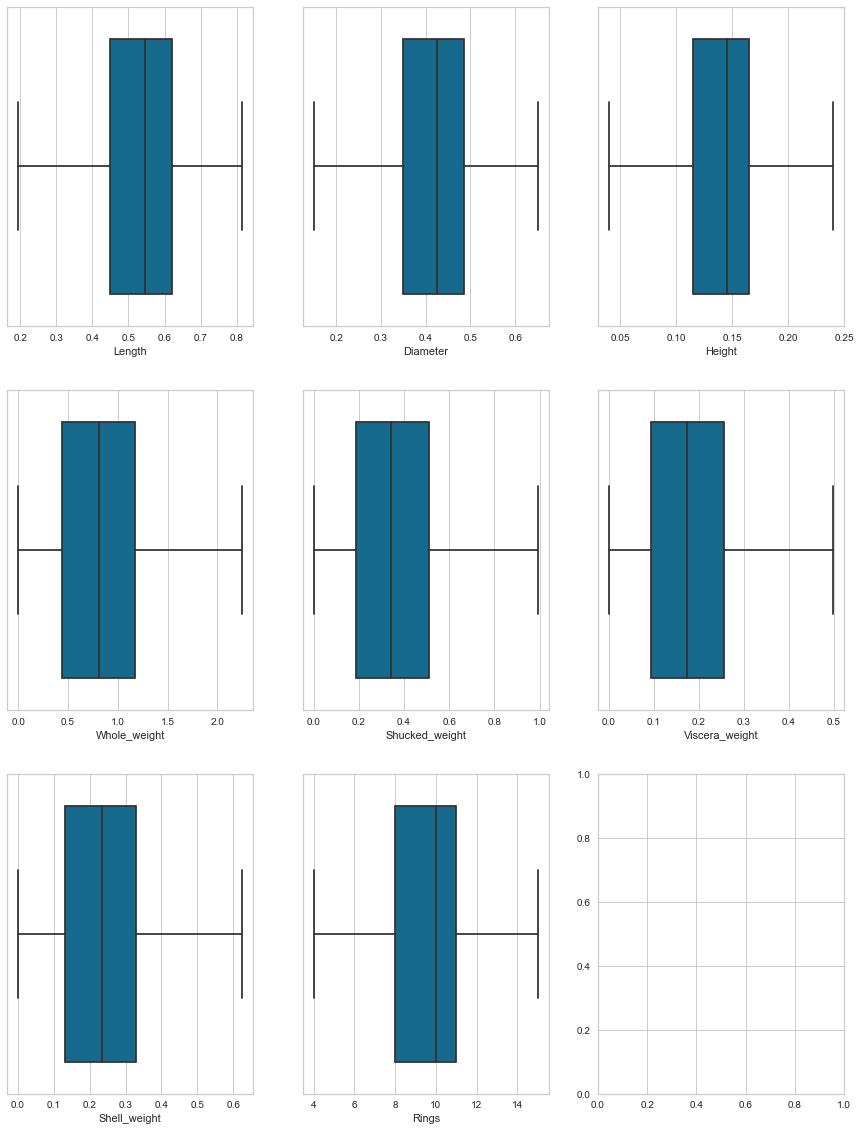

In [68]:
fig, axes=plt.subplots(3,3,figsize=(15,20))
sns.boxplot(data=data1,x=data1['Length'],ax=axes[0,0])
sns.boxplot(data=data1,x=data1['Diameter'],ax=axes[0,1])
sns.boxplot(data=data1,x=data1['Height'],ax=axes[0,2])
sns.boxplot(data=data1,x=data1['Whole_weight'],ax=axes[1,0])
sns.boxplot(data=data1,x=data1['Shucked_weight'],ax=axes[1,1])
sns.boxplot(data=data1,x=data1['Viscera_weight'],ax=axes[1,2])
sns.boxplot(data=data1,x=data1['Shell_weight'],ax=axes[2,0])
sns.boxplot(data=data1,x=data1['Rings'],ax=axes[2,1])

In [69]:
obj_col=['Sex']

In [71]:
encoder=HashingEncoder(cols=obj_col,n_components=3)
data2=encoder.fit_transform(data1)

In [72]:
data2.columns

Index(['col_0', 'col_1', 'col_2', 'Id', 'Length', 'Diameter', 'Height',
       'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight',
       'Rings'],
      dtype='object')

In [74]:
X=data2.drop('Rings',axis=1)
y=data2['Rings']

In [75]:
X_scaled=StandardScaler().fit_transform(X)
X=pd.DataFrame(data=X_scaled,columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (2672, 11)
y_train shape:  (2672,)

Test cases as below
X_test shape:  (669, 11)
y_test shape:  (669,)


C:\Users\7560\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RMSE for training set is 0.4917293552134993
RMSE for test set is 0.48468190624074314


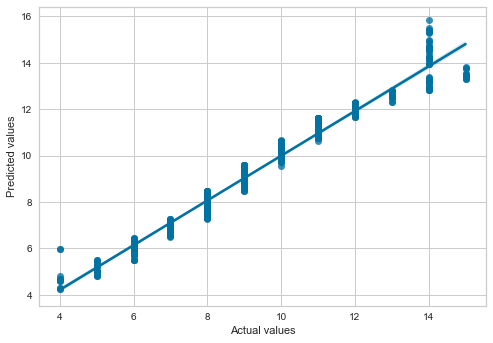

In [76]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train=linreg.predict(X_train)
y_pred_test=linreg.predict(X_test)
sns.regplot(y_test,y_pred_test)
plt.xlabel(xlabel='Actual values')
plt.ylabel(ylabel='Predicted values')
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

In [77]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.5181089180525865
RMSE for test set is 0.5214045422785522


In [78]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.1826197325953586
RMSE for test set is 0.2609501884084908


In [79]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_train=dtr.predict(X_train)
y_pred_test=dtr.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.0
RMSE for test set is 0.09470274476207567


In [80]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.022961827213487086
RMSE for test set is 0.07351418113603422


In [81]:
selector=SelectFromModel(estimator=RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1))
selector.fit(X,y)
selected_feat=X.columns[(selector.get_support())].to_list()
print('Total Features Selected are', len(selected_feat))
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.09
Important Features: ['Whole_weight', 'Shucked_weight', 'Shell_weight']


In [86]:
X1=data2[['Whole_weight', 'Shucked_weight', 'Shell_weight']]
y1=data2['Rings']

In [87]:
X_scaled=StandardScaler().fit_transform(X1)
X1=pd.DataFrame(data=X_scaled,columns=X1.columns)

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (2672, 3)
y_train shape:  (2672,)

Test cases as below
X_test shape:  (669, 3)
y_test shape:  (669,)


In [89]:
rfft=RandomForestRegressor()
rfft.fit(X_train,y_train)
y_pred_train=rfft.predict(X_train)
y_pred_test=rfft.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.0251766283466679
RMSE for test set is 0.06756477266469334


In [97]:
test=pd.read_csv('abalone_test.csv')
print(test.columns)
test.shape

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
      dtype='object')


(836, 9)

In [91]:
encoder=HashingEncoder(cols=obj_col,n_components=3)
test2=encoder.fit_transform(test)

In [92]:
X_scaled=StandardScaler().fit_transform(test2)
test2=pd.DataFrame(data=X_scaled,columns=test2.columns)

In [98]:
result=rf.predict(test2)
result1=np.round(result)
result1=pd.Series(data=result1)
submission=pd.read_csv('abalone_test.csv')
submission['Rings']=result1
submission.drop(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight'],axis=1,inplace=True)
submission.to_csv('submission_file.csv',index=False,header=False)